<a href="https://colab.research.google.com/github/Mohamed-DL/COM5004-RF/blob/main/lecture_15_random_forest_with_eda_and_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Random Forest with EDA and Hyperparameter Tuning

## Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
## Load Dataset
# Replace 'heart_v2.csv' with the correct path or upload the file to Colab
data = pd.read_csv('heart_v2.csv')

## Exploratory Data Analysis (EDA)

# Basic Info and Statistics
print(data.info())
print(data.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB
None
              age         sex          BP  cholestrol  heart disease
count  270.000000  270.000000  270.000000  270.000000     270.000000
mean    54.433333    0.677778  131.344444  249.659259       0.444444
std      9.109067    0.468195   17.861608   51.686237       0.497827
min     29.000000    0.000000   94.000000  126.000000       0.000000
25%     48.000000    0.000000  120.000000  213.000000       0.000000
50%     55.000000    1.000000  130.000000  245.000000       0.000000
75%     61.000000    1.000000  140.000000  280.000000       1.000000
max   

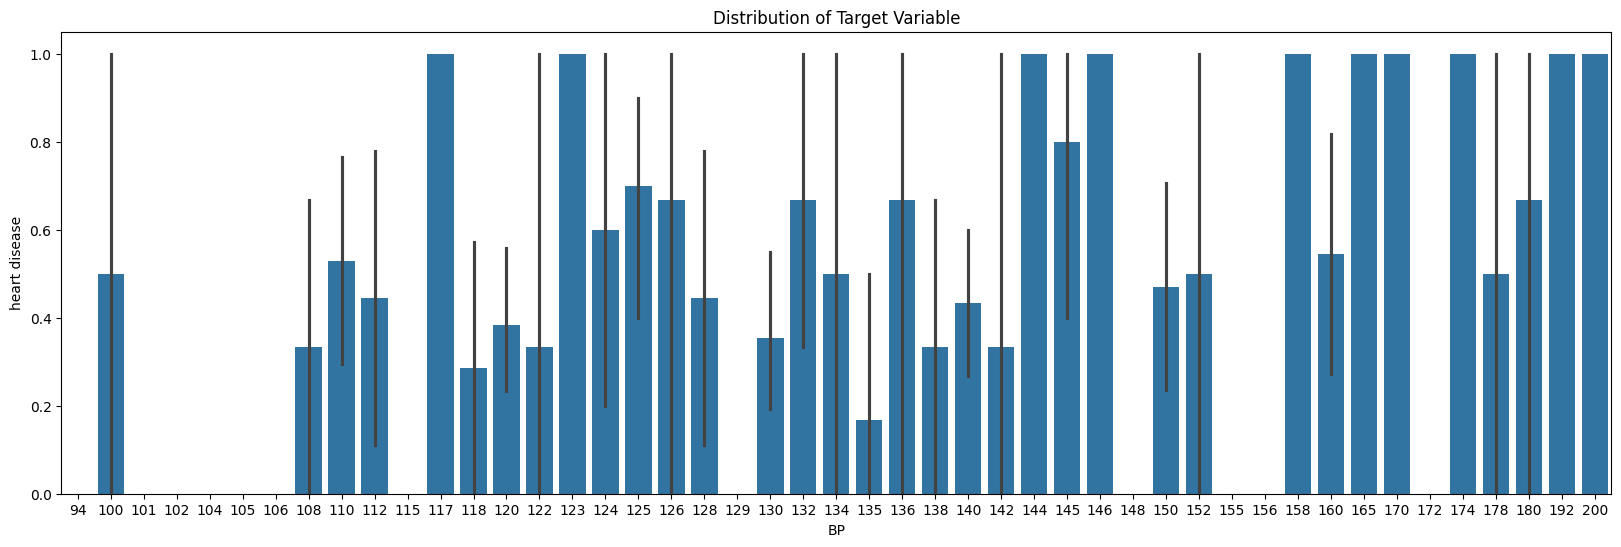

In [ ]:
# Distribution of Target Variable
plt.figure(figsize=(20, 6))
sns.barplot(x='BP', y='heart disease', data=data) # Corrected function name to scatterplot, and 'y' for the target variable'it will produce error change the to column name
plt.title('Distribution of Target Variable')
plt.show()



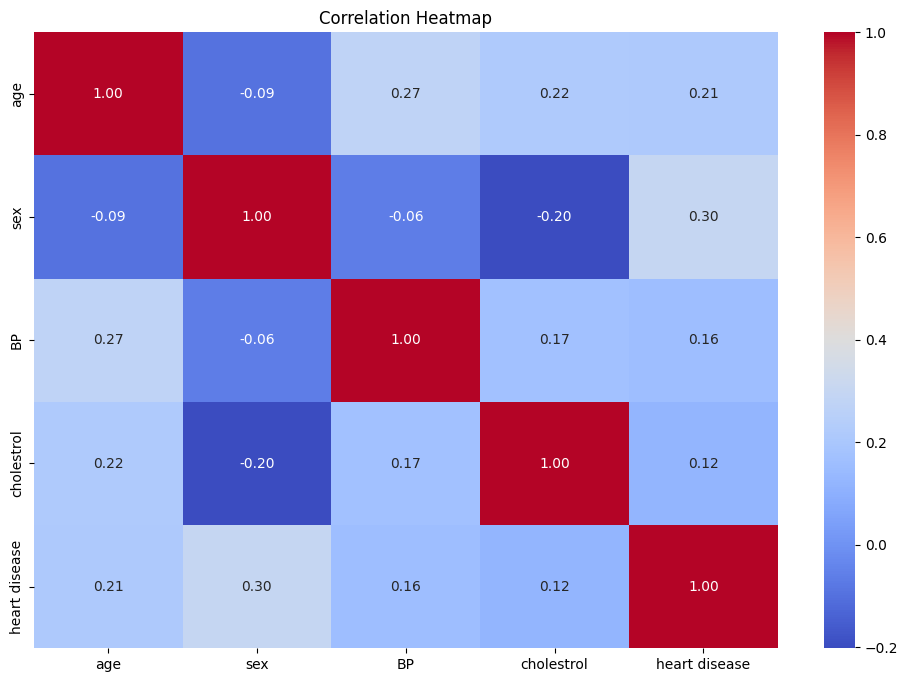

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



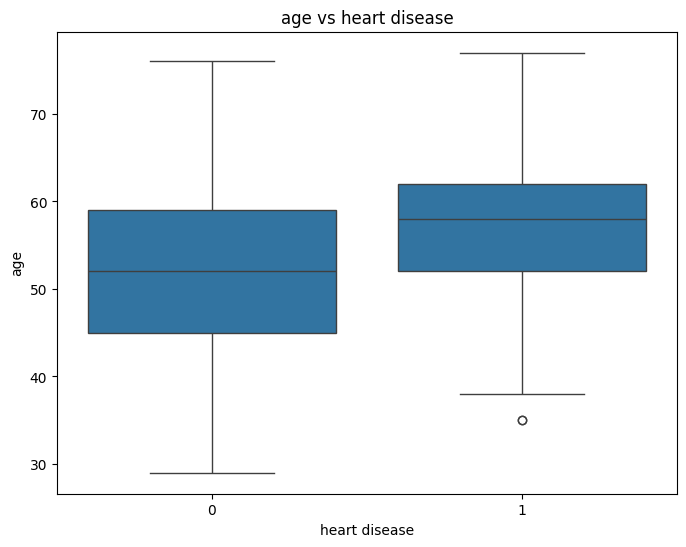

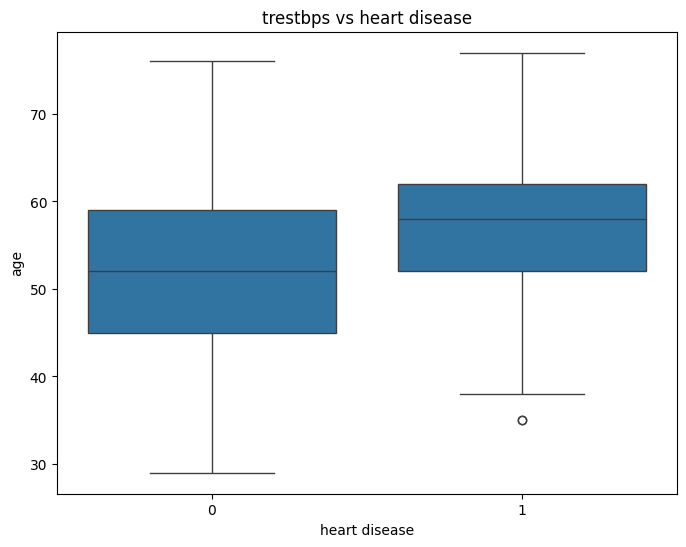

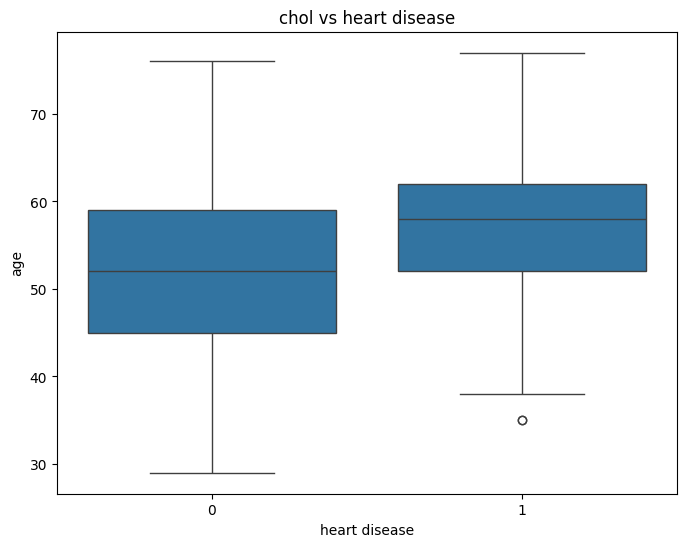

In [ ]:
# Boxplot of Key Features Against Target
key_features = ['age', 'trestbps', 'chol']
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='heart disease', y='age', data=data)
    plt.title(f'{feature} vs heart disease')
    plt.show()



In [ ]:
## Data Preparation

# Splitting into Features and Target
X = data.drop('age', axis=1)
y = data['heart disease']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
## Random Forest Model

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Fit the Model
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Predictions and Evaluation
y_pred = rf.predict(X_test)
print("Initial Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Initial Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        21

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
## Hyperparameter Tuning with GridSearchCV

# Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [ ]:
# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Best Parameters and Scores
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validated Accuracy: 1.0


In [ ]:
# Evaluate the Best Model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report (Tuned Model):\n", classification_report(y_test, y_pred_best))

Tuned Model Accuracy: 1.0
Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        21

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



# Hyperparameter Tuning:

* Using GridSearchCV to optimize parameters like:
* n_estimators (number of trees),
* max_depth (maximum depth of trees),
* min_samples_split (minimum samples to split a node),
* min_samples_leaf (minimum samples per leaf).
* Evaluating the best model using test data.

# What is GridSearchCV?
GridSearchCV is a method in `scikit-learn` that is used to systematically search for the best combination of hyperparameters for a given machine learning model. It helps optimise the model's performance by testing all possible combinations of a specified set of hyperparameters.

# How it Works
Define Hyperparameter Grid:

You create a dictionary where keys are the names of hyperparameters, and values are lists of possible values to test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


In [ ]:
# Random Forest with EDA and Hyperparameter Tuning

## Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

## Load Dataset
# Replace 'heart_v2.csv' with the correct path or upload the file to Colab
data = pd.read_csv('heart_v2.csv')

## Exploratory Data Analysis (EDA)

# Basic Info and Statistics
print(data.info())
print(data.describe())

# Distribution of Target Variable
plt.figure(figsize=(8, 6))
# Check if 'target' is the correct column name, it might be 'Target', 'TARGET', or something else.
# If unsure, print data.columns to see all column names
sns.countplot(x='target', data=data)  # Replace 'target' with the actual column name if needed
plt.title('Distribution of Target Variable')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of Key Features Against Target
key_features = ['age', 'trestbps', 'chol']
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=feature, data=data)  # Replace 'target' if needed
    plt.title(f'{feature} vs Target')
    plt.show()

## Data Preparation

# Splitting into Features and Target
# Replace 'target' with the actual column name if needed
X = data.drop('target', axis=1)
y = data['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Model

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Fit the Model
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test)
print("Initial Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

## Hyperparameter Tuning with GridSearchCV

# Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Scores
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the Best Model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report (Tuned Model):\n", classification_report(y_test, y_pred_best))